<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
address="C:/Users/ANTHONY/Desktop/CSV&XLSX/insurance_data.csv"
df = pd.read_csv(address)
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


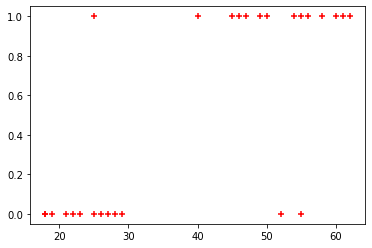

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

SUPPOSE IF WE TRY TO MAKE A LINEAR REG LINE IN THIS ....IT WOULD SOMEWHAT LOOK LIKE THIS....

In [9]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(df[['age']],df.bought_insurance)


LinearRegression()

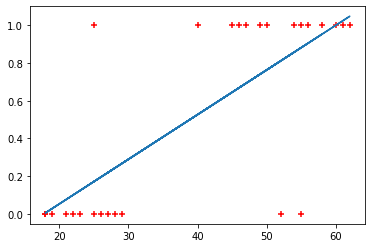

In [10]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.plot(df.age,lr.predict(df[['age']]))
plt.show()

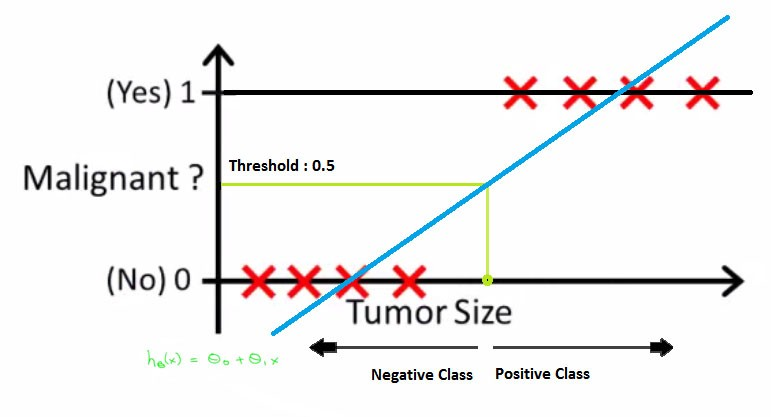

IN THIS CASE WE CAN MAKE IT LIKE THOSE WHO IS ABOVE 40 WILL TAKE INSURANCE AND LESS THAN 40 NO.....BUT WHAT IF THERE IS DATA OF PEOPLE ABOVE 80 AND 90 ARE ADDED...

THEN THE LINE SLOPE MOVES AWAY...AND IT WOULD BE DIFFICLUT 
THIS IS ACUTALLY BAD FOR PREDICTION......HENCE WE NEED TO USE LOGISITIC REGRESSION....

In [13]:
df.loc[len(df.index)] = [86, 1]  
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


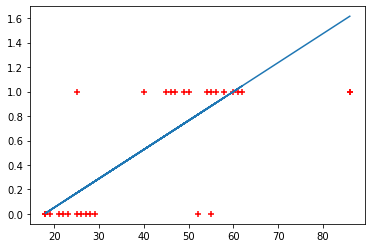

In [14]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.plot(df.age,lr.predict(df[['age']]))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#df[["age"]] is being used cause in x axis input should be [2d or a df]   but in y axis it should be panda series[1d]
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [22]:
X_train

,age
16,25
4,46
22,40
1,25
18,19
12,27
13,29
2,47
0,22
10,18


In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
X_test

,age
21,26
7,60
15,55
14,49
8,62
20,21


In [28]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [31]:
 model.predict([[45]])

array([1], dtype=int64)

In [32]:
import numpy as np
ls=[[75],[10]]
ar = np.array(ls) 
model.predict(ar)

array([1, 0], dtype=int64)

In [26]:
model.predict_proba(X_test)     
# for age 26 [0.40569485, 0.59430515] ---- .4 probabilty that it wont take , .5 that it will take insurance...

array([[0.82464601, 0.17535399],
       [0.08304057, 0.91695943],
       [0.13932963, 0.86067037],
       [0.24530135, 0.75469865],
       [0.06697704, 0.93302296],
       [0.89369121, 0.10630879]])

In [27]:
model.score(X_test,y_test)   #accuracy of model is shown....1 means its perfect

1.0

In [40]:
y_predicted

array([1, 1, 0, 1, 1, 1], dtype=int64)

In [37]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


**model.coef_ indicates value of m in y=m*x + b equation**

In [67]:
model.coef_

array([[0.04150133]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [68]:
model.intercept_

array([-1.52726963])

**Lets defined sigmoid function now and do the math with hand**

In [43]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [75]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [76]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [77]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model